<h1>Restaurant recommendations in Victoria Island, Lagos</h1>

**Introduction**
The city of Lagos is the most populous city in Nigeria and one of the fastest growing cities in the world. It is divided into two main geographical areas – the island and the mainland. Victoria Island, the business and financial centre of Lagos is located on the island. It is also one of the most expensive and exclusive areas to reside in Lagos. Victoria Island is packed with offices, restaurants, hotels and night life. For people that are new to Lagos and staying in Victoria Island, it can be daunting to figure out what restaurants are worth going to and where they are. 
    
**Business Problem**
For this project, I am going to create a simple guide on where to eat based on Foursquare likes, restaurant category and geographic location data for restaurants in Victoria Island.  I will then cluster these restaurants based on their similarities so that a user can easily determine what type of restaurants are best to eat at based on Foursquare user feedback.



<h2>Data required</h2>
For this project, I will be utilizing the Foursquare API to pull the following location data on restaurants in Victoria Island:
•	Venue Name <br>
•	Venue ID <br>
•	Venue Location <br> 
•	Venue Category <br> 
•	Count of Likes <br>  


<h2> Data acquisition approach</h2>
To acquire the data mentioned above, I will do the following:<br>
•	Get geolocator latitude and longitude coordinates for Victoria Island, Lagos <br>
•	Use Foursquare API to get a list of all venues in Victoria Island <br>
o	Get venue name, venue ID, location, category, and likes


<h3>Algorithm Used</h3>
I will take the gathered data (see above in Data Acquisition Approach and Data Required sections) and will create a k-means clustering algorithm that groups restaurants into 4-5 clusters so that people looking to eat in Victoria Island can easily see which restaurants are the best to eat at, what cuisine is available and where in Victoria Island they can look to eat.

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#import beautiful soup
!pip install beautifulsoup4
from urllib.request import urlopen
from bs4 import BeautifulSoup


print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          90 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.49   | 

In [3]:
address = 'Victoria Island, Lagos, Nigeria'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Victoria Island are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Victoria Island are 6.4300279, 3.4259904.


In [4]:
CLIENT_ID = 'QMJRUQKXQFD1O32TVR5LUCOOTH4VFM1RTYZLQSLF2UFVBEVM' # your Foursquare ID
CLIENT_SECRET = 'FVMIBKLRYWKHB21A4QF5F4BM1RTEGFDMVODRCZDSWU13NXUD' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QMJRUQKXQFD1O32TVR5LUCOOTH4VFM1RTYZLQSLF2UFVBEVM
CLIENT_SECRET:FVMIBKLRYWKHB21A4QF5F4BM1RTEGFDMVODRCZDSWU13NXUD


In [5]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=QMJRUQKXQFD1O32TVR5LUCOOTH4VFM1RTYZLQSLF2UFVBEVM&client_secret=FVMIBKLRYWKHB21A4QF5F4BM1RTEGFDMVODRCZDSWU13NXUD&v=20180605&ll=6.4300279,3.4259904&radius=1000&limit=100'

In [6]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d6432985fc8ed00300695b8'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Victoria Island',
  'headerFullLocation': 'Victoria Island, Lagos',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 77,
  'suggestedBounds': {'ne': {'lat': 6.439027909000009,
    'lng': 3.435030472765883},
   'sw': {'lat': 6.421027890999991, 'lng': 3.4169503272341166}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '56ab7d27498e3b4bd008d6b2',
       'name': 'Cafe Neo at fourteen36',
       'location': {'lat': 6.431199789000759,
        'lng': 3.426356189517245,
        'labeledLatLngs': [{'label': 'display',
          'lat': 6.431199789000759,
         

In [7]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [9]:
#pull the actual data from the Foursquare API

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,Cafe Neo at fourteen36,56ab7d27498e3b4bd008d6b2,Café,6.431200,3.426356
1,Shaunz Bar and lounge,4f63a0bbe4b02ac2c446daec,Karaoke Bar,6.431337,3.428540
2,355 Restaurant & Lounge,52d0759f498e2a73b7ab5ef7,Lounge,6.428589,3.428468
3,Bottles,4c8968931eafb1f736507135,Mexican Restaurant,6.426929,3.426862
4,R.S.V.P,54836830498ebb1006e510ad,Restaurant,6.428207,3.421662
5,Bungalows Restaurant,4c4776901ddec928a86e9d32,Pub,6.430247,3.425182
6,Spice Route,523f0417498e057b85aea83c,Asian Restaurant,6.429557,3.419823
7,Eko Hotel Signature,5298c50a11d24998ec1e70e8,Hotel,6.427168,3.430402
8,Crossroads,55fb140d498eb46117541a06,Mexican Restaurant,6.426633,3.430207
9,Cafe Neo,51603e25498eedc7cc86aa2b,Café,6.428494,3.424145


In [10]:
#fix the column names so they look relatively normal

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,id,categories,lat,lng
0,Cafe Neo at fourteen36,56ab7d27498e3b4bd008d6b2,Café,6.431200,3.426356
1,Shaunz Bar and lounge,4f63a0bbe4b02ac2c446daec,Karaoke Bar,6.431337,3.428540
2,355 Restaurant & Lounge,52d0759f498e2a73b7ab5ef7,Lounge,6.428589,3.428468
3,Bottles,4c8968931eafb1f736507135,Mexican Restaurant,6.426929,3.426862
4,R.S.V.P,54836830498ebb1006e510ad,Restaurant,6.428207,3.421662
5,Bungalows Restaurant,4c4776901ddec928a86e9d32,Pub,6.430247,3.425182
6,Spice Route,523f0417498e057b85aea83c,Asian Restaurant,6.429557,3.419823
7,Eko Hotel Signature,5298c50a11d24998ec1e70e8,Hotel,6.427168,3.430402
8,Crossroads,55fb140d498eb46117541a06,Mexican Restaurant,6.426633,3.430207
9,Cafe Neo,51603e25498eedc7cc86aa2b,Café,6.428494,3.424145


In [11]:
# find a list of unique categories from the API so we can see what may or may not fit for restaurants

nearby_venues['categories'].unique()

array(['Café', 'Karaoke Bar', 'Lounge', 'Mexican Restaurant',
       'Restaurant', 'Pub', 'Asian Restaurant', 'Hotel', 'Art Gallery',
       'Nightclub', 'Theater', 'Modern European Restaurant',
       'Burger Joint', 'Seafood Restaurant', 'Mediterranean Restaurant',
       'African Restaurant', 'Indian Restaurant', 'Department Store',
       'Chinese Restaurant', 'Pizza Place', 'Park', 'Dessert Shop',
       'Market', 'Steakhouse', 'Shopping Mall', 'Resort',
       'Italian Restaurant', 'Thai Restaurant', 'Convenience Store',
       'Beach', 'Fast Food Restaurant', 'Japanese Restaurant',
       'Cocktail Bar', 'Bookstore', 'Pool', 'Bistro', 'Spa'], dtype=object)

In [12]:
# creating a list of categorie to remove from our dataframe because they are not restaurants
# I am sure there is a function that can be written to do this at scale but since it was a small list, I did it manually

removal_list = ['Convenience Store', 'Bookstore']

nearby_venues2 = nearby_venues.copy()


#getting a clear dataframe of just restaurants
nearby_venues2 = nearby_venues2[~nearby_venues2['categories'].isin(removal_list)]
nearby_venues2

,name,id,categories,lat,lng
0,Cafe Neo at fourteen36,56ab7d27498e3b4bd008d6b2,Café,6.431200,3.426356
1,Shaunz Bar and lounge,4f63a0bbe4b02ac2c446daec,Karaoke Bar,6.431337,3.428540
2,355 Restaurant & Lounge,52d0759f498e2a73b7ab5ef7,Lounge,6.428589,3.428468
3,Bottles,4c8968931eafb1f736507135,Mexican Restaurant,6.426929,3.426862
4,R.S.V.P,54836830498ebb1006e510ad,Restaurant,6.428207,3.421662
5,Bungalows Restaurant,4c4776901ddec928a86e9d32,Pub,6.430247,3.425182
6,Spice Route,523f0417498e057b85aea83c,Asian Restaurant,6.429557,3.419823
7,Eko Hotel Signature,5298c50a11d24998ec1e70e8,Hotel,6.427168,3.430402
8,Crossroads,55fb140d498eb46117541a06,Mexican Restaurant,6.426633,3.430207
9,Cafe Neo,51603e25498eedc7cc86aa2b,Café,6.428494,3.424145


In [13]:
#let's get a list of venues

venue_id_list = nearby_venues2['id'].tolist()
venue_id_list

['56ab7d27498e3b4bd008d6b2',
 '4f63a0bbe4b02ac2c446daec',
 '52d0759f498e2a73b7ab5ef7',
 '4c8968931eafb1f736507135',
 '54836830498ebb1006e510ad',
 '4c4776901ddec928a86e9d32',
 '523f0417498e057b85aea83c',
 '5298c50a11d24998ec1e70e8',
 '55fb140d498eb46117541a06',
 '51603e25498eedc7cc86aa2b',
 '4c112e99f1b6a5938d1a7d27',
 '530c7fc4498ee69cc24966f5',
 '548f3105498ed35b87650aac',
 '56226115498e8bba5a0dadf4',
 '575c1691498ec53272a147b9',
 '51a5d221498e1eb59a79c54a',
 '4eabd7ae6da1cafdae8028d6',
 '5683d5b3498eecea1d51be8e',
 '50c9e480e4b0d44e4818c5b3',
 '505632c4e4b0e7ceb78b1499',
 '56caf22d498e9ce2cbd69ad0',
 '5008503ee4b0dfac2d5bff63',
 '4f81f717e4b0fc8b19f979f6',
 '4bbf335298f49521c638d263',
 '4cc966a5e7926dcb6a105c77',
 '4cd4b2f4ab19a0930f153beb',
 '567c3a8c498e4bd360eacbc7',
 '5a5a4de835811b435b45d739',
 '4c6275ac58810f470c32071e',
 '4c4c15cb42b4d13ace00947f',
 '4fdded4ee4b0e07803798e4f',
 '5121093de4b0a441016a5095',
 '4c3b347a16cb2d7f9d6f02a9',
 '56d8398b498e3d88a6a55ff9',
 '4dade258f7b1

In [14]:
#set up to pull the likes from the API based on venue ID

url_list = []
like_list = []
json_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[14, 53, 21, 66, 46, 55, 101, 16, 14, 24, 30, 42, 52, 17, 10, 54, 13, 39, 72, 78, 11, 13, 12, 135, 10, 13, 20, 7, 36, 147, 17, 10, 42, 26, 30, 9, 11, 7, 9, 8, 70, 7, 19, 8, 8, 5, 26, 11, 43, 92, 6, 16, 20, 9, 15, 12, 10, 8, 6, 6, 17, 3, 10, 19, 7, 3, 4, 10, 5, 5, 3, 2, 3, 6, 2]


In [15]:
#double check that we did not lose any venues based on if likes were available

print(len(like_list))
print(len(venue_id_list))

75
75


In [16]:
#let's make a copy of our initial dataframe just in case anything goes wrong

victoriaisland_venues = nearby_venues2.copy()
victoriaisland_venues.head()

,name,id,categories,lat,lng
0,Cafe Neo at fourteen36,56ab7d27498e3b4bd008d6b2,Café,6.431200,3.426356
1,Shaunz Bar and lounge,4f63a0bbe4b02ac2c446daec,Karaoke Bar,6.431337,3.428540
2,355 Restaurant & Lounge,52d0759f498e2a73b7ab5ef7,Lounge,6.428589,3.428468
3,Bottles,4c8968931eafb1f736507135,Mexican Restaurant,6.426929,3.426862
4,R.S.V.P,54836830498ebb1006e510ad,Restaurant,6.428207,3.421662


In [17]:
# add in the list of likes

victoriaisland_venues['total likes'] = like_list
victoriaisland_venues.head()

,name,id,categories,lat,lng,total likes
0,Cafe Neo at fourteen36,56ab7d27498e3b4bd008d6b2,Café,6.431200,3.426356,14
1,Shaunz Bar and lounge,4f63a0bbe4b02ac2c446daec,Karaoke Bar,6.431337,3.428540,53
2,355 Restaurant & Lounge,52d0759f498e2a73b7ab5ef7,Lounge,6.428589,3.428468,21
3,Bottles,4c8968931eafb1f736507135,Mexican Restaurant,6.426929,3.426862,66
4,R.S.V.P,54836830498ebb1006e510ad,Restaurant,6.428207,3.421662,46


In [19]:
# bin total likes

print(victoriaisland_venues['total likes'].max())
print(victoriaisland_venues['total likes'].min())
print(victoriaisland_venues['total likes'].median())
print(victoriaisland_venues['total likes'].mean())

147
2
13.0
25.14666666666667


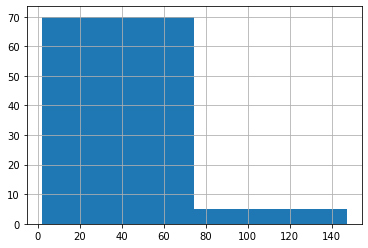

In [21]:
# let's visualize our total likes based on a histogram

import matplotlib.pyplot as plt
victoriaisland_venues['total likes'].hist(bins=2)
plt.show()

In [57]:
# what are the bins we want to use?

print(np.percentile(victoriaisland_venues['total likes'], 25))
print(np.percentile(victoriaisland_venues['total likes'], 50))
print(np.percentile(victoriaisland_venues['total likes'], 75))

8.0
13.0
30.0


In [24]:
# now we have our bin values so let's set them to the appropriate values
# less than 8, 8-13, 13-30, 30>
# poor, below avg, abv avg, great

poor = victoriaisland_venues['total likes']<=8
below_avg = victoriaisland_venues[(victoriaisland_venues['total likes']>8) & (victoriaisland_venues['total likes']<=13)]
abv_avg = victoriaisland_venues[(victoriaisland_venues['total likes']>13) & (victoriaisland_venues['total likes']<=30)]
great = victoriaisland_venues['total likes']>30

In [58]:
# let's set up a function that will re-categorize our restaurants based on likes

def conditions(s):
    if s['total likes']<=8:
        return 'poor'
    if s['total likes']<=13:
        return 'below avg'
    if s['total likes']<=30:
        return 'avg avg'
    if s['total likes']>30:
        return 'great'

victoriaisland_venues['total likes_cat']=victoriaisland_venues.apply(conditions, axis=1)

In [27]:
victoriaisland_venues

,name,id,categories,lat,lng,total likes,total likes_cat
0,Cafe Neo at fourteen36,56ab7d27498e3b4bd008d6b2,Café,6.431200,3.426356,14,avg avg
1,Shaunz Bar and lounge,4f63a0bbe4b02ac2c446daec,Karaoke Bar,6.431337,3.428540,53,great
2,355 Restaurant & Lounge,52d0759f498e2a73b7ab5ef7,Lounge,6.428589,3.428468,21,avg avg
3,Bottles,4c8968931eafb1f736507135,Mexican Restaurant,6.426929,3.426862,66,great
4,R.S.V.P,54836830498ebb1006e510ad,Restaurant,6.428207,3.421662,46,great
5,Bungalows Restaurant,4c4776901ddec928a86e9d32,Pub,6.430247,3.425182,55,great
6,Spice Route,523f0417498e057b85aea83c,Asian Restaurant,6.429557,3.419823,101,great
7,Eko Hotel Signature,5298c50a11d24998ec1e70e8,Hotel,6.427168,3.430402,16,avg avg
8,Crossroads,55fb140d498eb46117541a06,Mexican Restaurant,6.426633,3.430207,14,avg avg
9,Cafe Neo,51603e25498eedc7cc86aa2b,Café,6.428494,3.424145,24,avg avg


In [29]:
# let's star the process for re-categorizing the categories

victoriaisland_venues['categories'].unique()

array(['Café', 'Karaoke Bar', 'Lounge', 'Mexican Restaurant',
       'Restaurant', 'Pub', 'Asian Restaurant', 'Hotel', 'Art Gallery',
       'Nightclub', 'Theater', 'Modern European Restaurant',
       'Burger Joint', 'Seafood Restaurant', 'Mediterranean Restaurant',
       'African Restaurant', 'Indian Restaurant', 'Department Store',
       'Chinese Restaurant', 'Pizza Place', 'Park', 'Dessert Shop',
       'Market', 'Steakhouse', 'Shopping Mall', 'Resort',
       'Italian Restaurant', 'Thai Restaurant', 'Beach',
       'Fast Food Restaurant', 'Japanese Restaurant', 'Cocktail Bar',
       'Pool', 'Bistro', 'Spa'], dtype=object)

In [30]:
# let's create our new categories and create a function to apply those to our existing data


bars = ['Karaoke Bar', 'Lounge', 'Pub', 'Nightclub', 'Cocktail Bar']
other = ['Café', 'Hotel', 'Art Gallery', 'Theater', 'Department Store', 'Park', 'Dessert Shop', 'Shopping Mall', 'Market', 'Resort', 'Beach', 'Pool', 'Spa']
american_mexican_food = ['Mexican Restaurant', 'Burger Joint', 'Steakhouse']
mediterranean_asian_food = ['Asian Restaurant', 'Seafood Restaurant', 'Mediterranean Restaurant', 'Indian Restaurant', 'Chinese Restaurant', 'Thai Restaurant', 'Japanese Restaurant']
local_food = ['Restaurant', 'African Restaurant', 'Fast Food Restaurant']
italian_european_food = ['Italian Restaurant', 'Bistro', 'Pizza Place', 'Modern European Restaurant']

def conditions2(s):
    if s['categories'] in bars:
        return 'bars'
    if s['categories'] in other:
        return 'other'
    if s['categories'] in american_mexican_food:
        return 'american mexican food'
    if s['categories'] in mediterranean_asian_food:
        return 'mediterranean asian food'
    if s['categories'] in local_food:
        return 'local food'
    if s['categories'] in italian_european_food:
        return 'italian european food'

victoriaisland_venues['categories_new']=victoriaisland_venues.apply(conditions2, axis=1)

In [32]:
victoriaisland_venues

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new
0,Cafe Neo at fourteen36,56ab7d27498e3b4bd008d6b2,Café,6.431200,3.426356,14,avg avg,other
1,Shaunz Bar and lounge,4f63a0bbe4b02ac2c446daec,Karaoke Bar,6.431337,3.428540,53,great,bars
2,355 Restaurant & Lounge,52d0759f498e2a73b7ab5ef7,Lounge,6.428589,3.428468,21,avg avg,bars
3,Bottles,4c8968931eafb1f736507135,Mexican Restaurant,6.426929,3.426862,66,great,american mexican food
4,R.S.V.P,54836830498ebb1006e510ad,Restaurant,6.428207,3.421662,46,great,local food
5,Bungalows Restaurant,4c4776901ddec928a86e9d32,Pub,6.430247,3.425182,55,great,bars
6,Spice Route,523f0417498e057b85aea83c,Asian Restaurant,6.429557,3.419823,101,great,mediterranean asian food
7,Eko Hotel Signature,5298c50a11d24998ec1e70e8,Hotel,6.427168,3.430402,16,avg avg,other
8,Crossroads,55fb140d498eb46117541a06,Mexican Restaurant,6.426633,3.430207,14,avg avg,american mexican food
9,Cafe Neo,51603e25498eedc7cc86aa2b,Café,6.428494,3.424145,24,avg avg,other


In [33]:
# one hot encoding
victoriaisland_onehot = pd.get_dummies(victoriaisland_venues[['categories_new', 'total likes_cat']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
victoriaisland_onehot['Name'] = victoriaisland_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [victoriaisland_onehot.columns[-1]] + list(victoriaisland_onehot.columns[:-1])
victoriaisland_onehot = victoriaisland_onehot[fixed_columns]

victoriaisland_onehot.head()

,Name,american mexican food,bars,italian european food,local food,mediterranean asian food,other,avg avg,below avg,great,poor
0,Cafe Neo at fourteen36,0,0,0,0,0,1,1,0,0,0
1,Shaunz Bar and lounge,0,1,0,0,0,0,0,0,1,0
2,355 Restaurant & Lounge,0,1,0,0,0,0,1,0,0,0
3,Bottles,1,0,0,0,0,0,0,0,1,0
4,R.S.V.P,0,0,0,1,0,0,0,0,1,0


In [34]:
cluster_df = victoriaisland_onehot.drop('Name', axis=1)

k_clusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 3, 2, 3, 3, 3, 3, 2, 2, 2], dtype=int32)

In [36]:
victoriaisland_venues['label'] = kmeans.labels_
victoriaisland_venues.head()

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
0,Cafe Neo at fourteen36,56ab7d27498e3b4bd008d6b2,Café,6.431200,3.426356,14,avg avg,other,2
1,Shaunz Bar and lounge,4f63a0bbe4b02ac2c446daec,Karaoke Bar,6.431337,3.428540,53,great,bars,3
2,355 Restaurant & Lounge,52d0759f498e2a73b7ab5ef7,Lounge,6.428589,3.428468,21,avg avg,bars,2
3,Bottles,4c8968931eafb1f736507135,Mexican Restaurant,6.426929,3.426862,66,great,american mexican food,3
4,R.S.V.P,54836830498ebb1006e510ad,Restaurant,6.428207,3.421662,46,great,local food,3


Visualize what the clusters look like in Victoria Island

In [37]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(victoriaisland_venues['lat'], victoriaisland_venues['lng'], victoriaisland_venues['name'], victoriaisland_venues['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h3>Cluster 1</h3>

In [53]:
vi = victoriaisland_venues.loc[victoriaisland_venues['label']==0]
vi.sort_values('categories_new')

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
71,De Marqee,4c73aa961b11199c4c316113,Cocktail Bar,6.433480,3.420338,5,poor,bars,0
41,Movida,4c411614da3dc9287177c8b9,Nightclub,6.433297,3.427134,7,poor,bars,0
44,Ntyce Lagos,50317602e4b0260c92ddd90d,Lounge,6.427462,3.425514,8,poor,bars,0
74,Eric Kayser,5bedd776446ea6002c2b01ca,Bistro,6.434303,3.431837,3,poor,italian european food,0
70,"1415 Fine Dining Italian Restaurant, Eko Signa...",546cf4dd498eef03ca0fbd61,Italian Restaurant,6.427218,3.430452,5,poor,italian european food,0
27,Sabor,5a5a4de835811b435b45d739,Restaurant,6.433263,3.429472,7,poor,local food,0
58,KFC,4e6f115d8998fd5c56738b48,Fast Food Restaurant,6.429315,3.422802,8,poor,local food,0
60,TFC Place,4c49b1083013a593b00316e3,Fast Food Restaurant,6.429441,3.426251,6,poor,local food,0
59,Bonzai,4d9b62b3335ab60cf1a3f9f9,Japanese Restaurant,6.425726,3.424112,6,poor,mediterranean asian food,0
62,Marcopolo,4f992121e4b0bda88800acff,Chinese Restaurant,6.426926,3.425577,3,poor,mediterranean asian food,0


<h3>Cluster 2</h3>

In [54]:
vi2=victoriaisland_venues.loc[victoriaisland_venues['label']==1]
vi2.sort_values('categories_new')

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
36,Talindos Steak house,4e40381a2271d21e8719951c,Steakhouse,6.426402,3.425435,11,below avg,american mexican food,1
35,Aura,4c532b4af5f3d13a0c120cf8,Nightclub,6.427092,3.429263,9,below avg,bars,1
63,Kudeta Lounge,52a353d311d278ee3e915806,Lounge,6.433468,3.420406,10,below avg,bars,1
25,SS Lounge,4cd4b2f4ab19a0930f153beb,Lounge,6.434328,3.421782,13,below avg,bars,1
47,Bar Campione,4f81b369e4b050ced70267c4,Italian Restaurant,6.425561,3.422309,11,below avg,italian european food,1
68,Milano Restaurant,51ef0365e4b05e2658f4b565,Italian Restaurant,6.434910,3.422778,10,below avg,italian european food,1
21,L'afrique Restaurant & Bar,5008503ee4b0dfac2d5bff63,African Restaurant,6.431256,3.429089,13,below avg,local food,1
22,Viceroy Restaurant,4f81f717e4b0fc8b19f979f6,Indian Restaurant,6.427469,3.423786,12,below avg,mediterranean asian food,1
31,Coral Blue,5121093de4b0a441016a5095,Seafood Restaurant,6.431368,3.424532,10,below avg,mediterranean asian food,1
20,Craft Gourmet,56caf22d498e9ce2cbd69ad0,Mediterranean Restaurant,6.433277,3.420752,11,below avg,mediterranean asian food,1


<h3>Cluster 3</h3>

In [55]:
vi3=victoriaisland_venues.loc[victoriaisland_venues['label']==2]
vi3.sort_values('categories_new')

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
8,Crossroads,55fb140d498eb46117541a06,Mexican Restaurant,6.426633,3.430207,14,avg avg,american mexican food,2
2,355 Restaurant & Lounge,52d0759f498e2a73b7ab5ef7,Lounge,6.428589,3.428468,21,avg avg,bars,2
53,Escape,534adcdd498ebdd3b463fb3c,Nightclub,6.431124,3.417887,20,avg avg,bars,2
61,Sky Lounge Eko Hotel,5144c57be4b087df7a15725a,Cocktail Bar,6.426262,3.430154,17,avg avg,bars,2
46,Bistro 7,4fa2e2e3e4b0e8e3878f6c9c,Italian Restaurant,6.432234,3.423042,26,avg avg,italian european food,2
10,Terra Kulture,4c112e99f1b6a5938d1a7d27,Restaurant,6.425012,3.426917,30,avg avg,local food,2
26,Nok by Alara,567c3a8c498e4bd360eacbc7,African Restaurant,6.430458,3.421360,20,avg avg,local food,2
34,Jevenik Restaurant,4dade258f7b17488f4862317,African Restaurant,6.429070,3.419177,30,avg avg,local food,2
55,Pearl Garden,51054414e4b0f8922c7b4fc4,Chinese Restaurant,6.426282,3.427893,15,avg avg,mediterranean asian food,2
51,Pattaya Restaurant,4cae280a1168a09370071823,Thai Restaurant,6.435524,3.429574,16,avg avg,mediterranean asian food,2


<h3>Cluster 4</h3>

In [56]:
vi4=victoriaisland_venues.loc[victoriaisland_venues['label']==3]
vi4.sort_values('categories_new')

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
3,Bottles,4c8968931eafb1f736507135,Mexican Restaurant,6.426929,3.426862,66,great,american mexican food,3
18,Johnny Rockets,50c9e480e4b0d44e4818c5b3,Burger Joint,6.423335,3.427493,72,great,american mexican food,3
1,Shaunz Bar and lounge,4f63a0bbe4b02ac2c446daec,Karaoke Bar,6.431337,3.428540,53,great,bars,3
5,Bungalows Restaurant,4c4776901ddec928a86e9d32,Pub,6.430247,3.425182,55,great,bars,3
12,Maison Fahrenheit,548f3105498ed35b87650aac,Nightclub,6.425953,3.428512,52,great,bars,3
48,Sip Bar,4f9b306de4b0027bd3f7781d,Nightclub,6.427168,3.424327,43,great,bars,3
17,Casper & Gambini's,5683d5b3498eecea1d51be8e,Modern European Restaurant,6.429813,3.418668,39,great,italian european food,3
28,Debonairs pizza,4c6275ac58810f470c32071e,Pizza Place,6.429953,3.419802,36,great,italian european food,3
4,R.S.V.P,54836830498ebb1006e510ad,Restaurant,6.428207,3.421662,46,great,local food,3
6,Spice Route,523f0417498e057b85aea83c,Asian Restaurant,6.429557,3.419823,101,great,mediterranean asian food,3
